Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

Вопрос: сколько в датасете пропущенных значений?

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/transaction_data.csv')


In [18]:
df.shape #размер таблицы

(5315, 3)

In [12]:
df.isna().sum() #число пропущенных значений

date           0
name           0
transaction    0
dtype: int64

In [9]:
df.dtypes #типы переменных

date           object
name           object
transaction    object
dtype: object

In [19]:
df.info() #описательная статистика

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [20]:
df.describe (include ='all') # описательная статистика

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


Проверьте, какие значения принимает колонка transaction . Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.

Вопрос: расположите уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему)

In [21]:
df.transaction.unique() #принимаемые значения

array(['cancelled', 'successfull', 'error'], dtype=object)

In [22]:
df.head()


,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [28]:
df.groupby('transaction').size().sort_values(ascending = False) #Сколько наблюдений относятся к тому или иному уровню и в порядке убывания

transaction
successfull    3692
cancelled      1619
error             4
dtype: int64

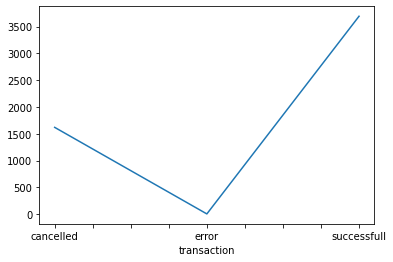

In [26]:
df.groupby('transaction').size().plot() #график

Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где

по оси x – число транзакций
по оси y – доля пользователей с таким числом транзакций

In [35]:
suc_trans = df.loc[df.transaction == 'successfull'].groupby('name').size() #количество успешных транзакций для пользователя

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


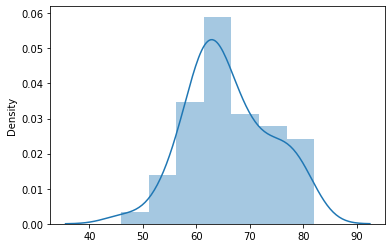

In [37]:
sns.distplot(suc_trans)

In [39]:
suc_trans.describe(include = 'all')

count    56.000000
mean     65.928571
std       7.787769
min      46.000000
25%      61.000000
50%      64.000000
75%      72.000000
max      82.000000
dtype: float64

💀 Сложное задание! 💀

К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:

столбцы – имена пользователей
строки – минута времени осуществления операции (minute)
значения – число совершённых операций
Пропущенные значения заполните нулями.

Note: фильтровать успешные транзакции не нужно - постройте табличку по всем

In [40]:
df_1 =pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/transaction_data_updated.csv')

In [58]:
user_vs_minute_pivot = df_1.groupby(['name','minute'],as_index = False)\
    .agg({'transaction':'count'})\
    .pivot (index = 'minute', columns = 'name', values = 'transaction')\
    .fillna(0)\

Исправьте ошибку коллеги (если она есть 😉), и посчитайте число минут, прошедших с начала дня. Результат сохраните в колонку true_minute. Постройте график, как в предыдущем шаге, и посмотрите, произошли ли изменения (график в код включать не нужно).

In [71]:
df_1['date']=pd.to_datetime(df_1['date'])


In [75]:
df_1['true_minute'] = df_1.date.dt.minute + (df_1.date.dt.hour *60)

In [79]:
dff = df_1.groupby('minute')\
    .agg({'name':'count'})

<Figure size 1008x720 with 0 Axes>

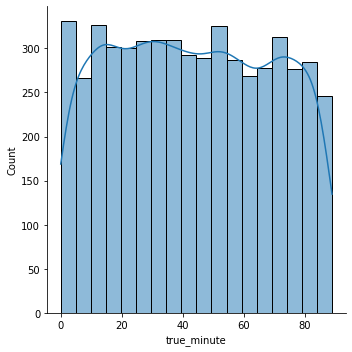

In [86]:
plt.figure(figsize=(14, 10))
sns.displot(data = df_1, x ='true_minute', kde = True)

In [80]:
dff

,name
minute,
0,111
1,145
2,123
3,129
4,92
5,99
6,110
7,111
8,111
